# Data Preprocessing

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# import dataset
dataset = pd.read_csv('C:/Users/Nandan/Dropbox/PG-DBDA CDAC Mumbai/ML/Data.csv')

In [5]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


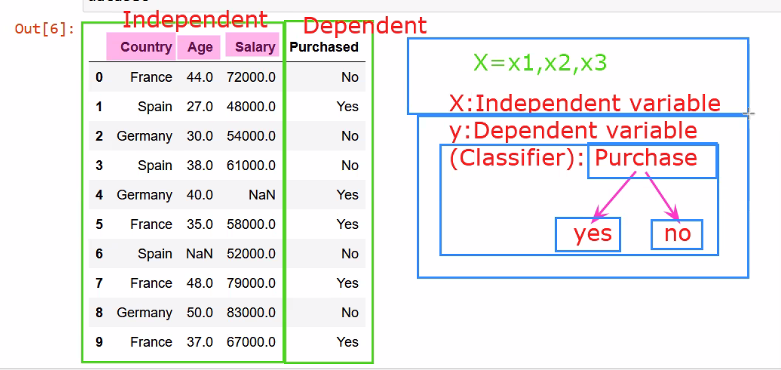

In [6]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
dataset.shape

(10, 4)

In [8]:
# creating the set X (features other than classifier) (independent variable)

X=dataset.iloc[:,:-1].values # using reverse indexing, leaving out the 4th column Purchased (classifier - dependent variable)
Y=dataset.iloc[:,-1].values

In [9]:
X #Independent variable

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [10]:
Y #Dependent variable

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [11]:
#Missing data
#SimpleImputer
#sklearn.impute : a package used for replacing missing values in a dataset using some criteria. 
#This package is present in the scikit-learn library

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#simple imputer is only applicable to numeric data#

imputer.fit(X[:,1:3]) #We are fitting the imputer object with the criteria on the input data. we are skipping the country column as it's mean cannot be calculated
X[:,1:3] = imputer.transform(X[:,1:3]) # transform() function here updates the existing numpy array with the imputed values


In [12]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [13]:
#Converting categorical data like the country feature (spain,germany,france) using one-hot encoding, label encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label=LabelEncoder()
label.fit_transform(X[:,0]) # selecting all rows of the country column
X[:,0] = label.fit_transform(X[:,0])

In [18]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [27]:
onehot=OneHotEncoder()
X=onehot.fit_transform(X[:,0]).toarray()

ValueError: Expected 2D array, got 1D array instead:
array=[0 2 1 2 1 0 2 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [37]:
oh = OneHotEncoder(sparse=False, handle_unknown="ignore")
oh_X = oh.fit_transform(X,X[:,0])
oh_X

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0.,

In [38]:
print(oh_X)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [17]:
onehot=OneHotEncoder()
temp=pd.DataFrame(onehot.fit_transform(dataset[['Country']]).toarray())

In [14]:
encode=pd.get_dummies(dataset, columns=['Country'])

In [15]:
encode

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,0,0,1
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,NaN,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,NaN,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,Yes,1,0,0


In [18]:
oh=dataset.join(temp)
oh

,Country,Age,Salary,Purchased,0,1,2
0,France,44.0,72000.0,No,1.0,0.0,0.0
1,Spain,27.0,48000.0,Yes,0.0,0.0,1.0
2,Germany,30.0,54000.0,No,0.0,1.0,0.0
3,Spain,38.0,61000.0,No,0.0,0.0,1.0
4,Germany,40.0,NaN,Yes,0.0,1.0,0.0
5,France,35.0,58000.0,Yes,1.0,0.0,0.0
6,Spain,NaN,52000.0,No,0.0,0.0,1.0
7,France,48.0,79000.0,Yes,1.0,0.0,0.0
8,Germany,50.0,83000.0,No,0.0,1.0,0.0
9,France,37.0,67000.0,Yes,1.0,0.0,0.0
